### Confidence Interval Analysis of Bagging and Whole Model

#### Importing the required Libraries

In [79]:
#Importing required libraries
import pandas as pd
import numpy as np

#### Importing the DataSet

In [80]:
# Importing the data file
data = pd.read_csv("GermanCredit.csv")

In [81]:
data.head()

,Unnamed: 0,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,1,6,1169,4,4,67,2,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,2,48,5951,2,2,22,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
2,3,12,2096,2,3,49,1,2,1,1,...,0,0,1,0,1,0,0,1,0,0
3,4,42,7882,2,4,45,1,2,1,1,...,0,0,1,0,0,1,0,0,1,0
4,5,24,4870,3,4,53,2,2,1,1,...,0,0,1,0,0,1,0,0,1,0


In [82]:
# Removing the first column and checking the info of other columns
data = data.drop(columns = ['Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

1. From this we see that there are no missing values in the data set
2. All the Variables are already integer but the Class Variable is still Object. We need to convert it into the dummy variable

In [83]:
# Checking the Class variable
data['Class'].value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

In [84]:
# Converting the Class Variable into dummy variable
data['Class1'] = np.where(data['Class'] == 'Good', 1,0)
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Class1
0,6,1169,4,4,67,2,1,0,1,Good,...,0,1,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,1,0,1,0,0,0,1,0,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,2,1,1,Good,...,0,1,0,0,1,0,0,1,0,1
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,1,0,0,1,0,0,1,0,0


In [85]:
data.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [86]:
# Checking the describe or summary statistics of all the variables and exporting it as a file
describe = data.describe()
#describe.to_excel('describe.xlsx')

In [87]:
# Dropping the class variable and few other variables
data = data.drop(columns = ['Class','OtherInstallmentPlans.Bank','OtherInstallmentPlans.Stores','OtherInstallmentPlans.None','Purpose.Vacation','Personal.Female.Single'])

### Feature Selection

In [88]:
# Importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [89]:
# Subsetting the data into X and y
y_df = data['Amount']
X_df = data.drop(columns = 'Amount')

In [90]:
X_df.shape

(1000, 56)

Feature: 0, Score: 65.44203
Feature: 1, Score: 24.15042
Feature: 2, Score: 0.00000
Feature: 3, Score: 26.71259
Feature: 4, Score: 40.44842
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 87.98815
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 91.16331
Feature: 11, Score: 72.17362
Feature: 12, Score: 74.46928
Feature: 13, Score: -0.00000
Feature: 14, Score: 5.58289
Feature: 15, Score: 70.44949
Feature: 16, Score: 0.00000
Feature: 17, Score: 11.47863
Feature: 18, Score: 95.47744
Feature: 19, Score: 54.02928
Feature: 20, Score: 85.01258
Feature: 21, Score: 55.62180
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 39.73152
Feature: 27, Score: 99.97084
Feature: 28, Score: -0.00000
Feature: 29, Score: 52.16011
Feature: 30, Score: 35.31607
Feature: 31, Score: 9.51188
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Featu

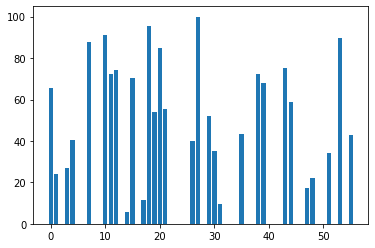

In [91]:
# Using the linear regression feature importance to find the top 30 important features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=56 ,n_informative=30, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [92]:
# Creating the Feature Importance DataFrame
feature = pd.DataFrame(X_df.columns)
feature.columns = ['Col_name']
feature['feature_coef'] = model.coef_

# Sorting the features based on the feature coefficients
feature = feature.sort_values(by = ['feature_coef'], ascending = False).reset_index()

# Selecting the Names of top 30 features
selected_features = list(feature.iloc[0:30,]['Col_name'])
selected_features

['SavingsAccountBonds.lt.100',
 'Purpose.UsedCar',
 'CheckingAccountStatus.gt.200',
 'Job.SkilledEmployee',
 'ForeignWorker',
 'Purpose.Radio.Television',
 'OtherDebtorsGuarantors.Guarantor',
 'CreditHistory.NoCredit.AllPaid',
 'CheckingAccountStatus.none',
 'Personal.Female.NotSingle',
 'CreditHistory.Delay',
 'Personal.Male.Single',
 'Duration',
 'Property.RealEstate',
 'Purpose.DomesticAppliance',
 'Purpose.Furniture.Equipment',
 'SavingsAccountBonds.500.to.1000',
 'EmploymentDuration.gt.7',
 'Class1',
 'NumberExistingCredits',
 'Purpose.Other',
 'SavingsAccountBonds.gt.1000',
 'Job.UnemployedUnskilled',
 'Age',
 'InstallmentRatePercentage',
 'Housing.Rent',
 'Property.Unknown',
 'Purpose.NewCar',
 'SavingsAccountBonds.Unknown',
 'CreditHistory.PaidDuly']

In [93]:
# Choosing only the selected features from the main data frame and adding the Amount variable
selected_features.append('Amount')
df = data[selected_features]
df.head()

,SavingsAccountBonds.lt.100,Purpose.UsedCar,CheckingAccountStatus.gt.200,Job.SkilledEmployee,ForeignWorker,Purpose.Radio.Television,OtherDebtorsGuarantors.Guarantor,CreditHistory.NoCredit.AllPaid,CheckingAccountStatus.none,Personal.Female.NotSingle,...,SavingsAccountBonds.gt.1000,Job.UnemployedUnskilled,Age,InstallmentRatePercentage,Housing.Rent,Property.Unknown,Purpose.NewCar,SavingsAccountBonds.Unknown,CreditHistory.PaidDuly,Amount
0,0,0,0,1,1,1,0,0,0,0,...,0,0,67,4,0,0,0,1,0,1169
1,1,0,0,1,1,1,0,0,0,1,...,0,0,22,2,0,0,0,0,1,5951
2,1,0,0,0,1,0,0,0,1,0,...,0,0,49,2,0,0,0,0,0,2096
3,1,0,0,1,1,0,1,0,0,0,...,0,0,45,2,0,0,0,0,1,7882
4,1,0,0,1,1,0,0,0,0,0,...,0,0,53,3,0,1,1,0,0,4870


### Regression Model

#### Developing code for Single Iteration

##### Step1: Train and Test Split

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# separate the independent and target variable 
X = df.drop(columns=['Amount'])
Y = df['Amount']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size= 0.368,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((632, 30), (368, 30), (632,), (368,))

##### Step2: Building the Model on training sample

In [95]:
# Create an object of the LinearRegression Model
model = LinearRegression()

# fit the model with the training data
model.fit(train_x, train_y)

# Extracting the Coefficients of the model
coef = model.coef_.round(2)

# predict the target on train and test data 
predict_train = model.predict(train_x)
predict_test  = model.predict(test_x)

# R square
train_r2 = (r2_score(train_y, predict_train)*100).round(2)
test_r2 = (r2_score(test_y, predict_test)*100).round(2)

# Root Mean Squared Error on train and test date
print('R-Square on train data: ', train_r2)
print('R-Square on test data: ',  test_r2)
print('Coefficients: ',  coef)

# Combining them into single array
Model1 = [train_r2, test_r2]
Model1.extend(coef)
print(Model1)

R-Square on train data:  57.61
R-Square on test data:  55.8
Coefficients:  [ 2.88210e+02  9.07720e+02 -6.18530e+02 -6.08160e+02 -2.21370e+02
  2.17400e+01 -7.97200e+01  6.28670e+02 -1.43000e+00 -7.80000e+00
  1.00660e+02  4.31920e+02  1.34220e+02 -5.19620e+02 -9.45030e+02
  1.56460e+02  1.28290e+02 -3.58440e+02 -2.12100e+02 -4.77800e+01
  1.77487e+03  1.94660e+02 -1.60081e+03  1.11800e+01 -8.04400e+02
  7.95400e+01  7.63260e+02  6.59900e+01  6.88970e+02 -1.63240e+02]
[57.61, 55.8, 288.21, 907.72, -618.53, -608.16, -221.37, 21.74, -79.72, 628.67, -1.43, -7.8, 100.66, 431.92, 134.22, -519.62, -945.03, 156.46, 128.29, -358.44, -212.1, -47.78, 1774.87, 194.66, -1600.81, 11.18, -804.4, 79.54, 763.26, 65.99, 688.97, -163.24]


### Iterating the Model 1000 times

In [96]:
# separate the independent and target variable 
X = df.drop(columns=['Amount'])
Y = df['Amount']

model_LR = []

def model_lr(X,Y):
    # randomly split the data
    train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size= 0.368)

    # Create an object of the LinearRegression Model
    model = LinearRegression()

    # fit the model with the training data
    model.fit(train_x, train_y)

    # Extracting the Coefficients of the model
    coef = model.coef_.round(2)

    # predict the target on train and test data 
    predict_train = model.predict(train_x)
    predict_test  = model.predict(test_x)

    # R square
    train_r2 = (r2_score(train_y, predict_train)*100).round(2)
    test_r2 = (r2_score(test_y, predict_test)*100).round(2)

    # Combining them into single array
    Model1 = [train_r2, test_r2]
    Model1.extend(coef)
    return Model1

In [97]:
models = []
for _ in range(1000):
    model_results = model_lr(X,Y)
    models.append(model_results)

In [98]:
len(models)

1000

In [99]:
X.columns

Index(['SavingsAccountBonds.lt.100', 'Purpose.UsedCar',
       'CheckingAccountStatus.gt.200', 'Job.SkilledEmployee', 'ForeignWorker',
       'Purpose.Radio.Television', 'OtherDebtorsGuarantors.Guarantor',
       'CreditHistory.NoCredit.AllPaid', 'CheckingAccountStatus.none',
       'Personal.Female.NotSingle', 'CreditHistory.Delay',
       'Personal.Male.Single', 'Duration', 'Property.RealEstate',
       'Purpose.DomesticAppliance', 'Purpose.Furniture.Equipment',
       'SavingsAccountBonds.500.to.1000', 'EmploymentDuration.gt.7', 'Class1',
       'NumberExistingCredits', 'Purpose.Other', 'SavingsAccountBonds.gt.1000',
       'Job.UnemployedUnskilled', 'Age', 'InstallmentRatePercentage',
       'Housing.Rent', 'Property.Unknown', 'Purpose.NewCar',
       'SavingsAccountBonds.Unknown', 'CreditHistory.PaidDuly'],
      dtype='object')

In [100]:
# Creating a Data Frame for the Model Coefficients, R-Square of all 1000 models
model_sum = pd.DataFrame(models, columns = ['train_r2', 'test_r2','SavingsAccountBonds.lt.100', 'Purpose.UsedCar',
       'CheckingAccountStatus.gt.200', 'Job.SkilledEmployee', 'ForeignWorker',
       'Purpose.Radio.Television', 'OtherDebtorsGuarantors.Guarantor',
       'CreditHistory.NoCredit.AllPaid', 'CheckingAccountStatus.none',
       'Personal.Female.NotSingle', 'CreditHistory.Delay',
       'Personal.Male.Single', 'Duration', 'Property.RealEstate',
       'Purpose.DomesticAppliance', 'Purpose.Furniture.Equipment',
       'SavingsAccountBonds.500.to.1000', 'EmploymentDuration.gt.7', 'Class1',
       'NumberExistingCredits', 'Purpose.Other', 'SavingsAccountBonds.gt.1000',
       'Job.UnemployedUnskilled', 'Age', 'InstallmentRatePercentage',
       'Housing.Rent', 'Property.Unknown', 'Purpose.NewCar',
       'SavingsAccountBonds.Unknown', 'CreditHistory.PaidDuly'])
model_sum

,train_r2,test_r2,SavingsAccountBonds.lt.100,Purpose.UsedCar,CheckingAccountStatus.gt.200,Job.SkilledEmployee,ForeignWorker,Purpose.Radio.Television,OtherDebtorsGuarantors.Guarantor,CreditHistory.NoCredit.AllPaid,...,Purpose.Other,SavingsAccountBonds.gt.1000,Job.UnemployedUnskilled,Age,InstallmentRatePercentage,Housing.Rent,Property.Unknown,Purpose.NewCar,SavingsAccountBonds.Unknown,CreditHistory.PaidDuly
0,57.54,55.06,416.14,534.14,-666.51,-597.26,252.31,-152.99,-199.15,538.34,...,2753.79,312.02,-476.59,6.56,-808.95,188.53,210.42,247.39,898.73,-139.62
1,58.22,53.55,290.77,721.96,-508.79,-560.71,14.92,-371.40,-268.91,763.30,...,3609.98,375.69,-1299.54,7.43,-865.15,-107.72,573.34,202.67,773.65,8.90
2,60.42,49.46,397.56,660.14,-536.45,-557.74,-484.91,-277.94,-285.39,1039.17,...,2478.30,220.19,-1713.02,14.84,-826.48,98.74,438.97,-234.56,712.37,-133.86
3,58.50,53.28,188.85,1247.98,-529.61,-505.26,48.19,-102.93,-246.99,831.64,...,3244.13,74.91,-1220.59,11.35,-729.94,66.84,658.99,94.56,574.59,96.75
4,57.56,54.21,172.46,865.69,-426.06,-800.34,-452.09,56.56,-286.15,627.58,...,1759.45,493.31,-150.13,4.34,-796.68,210.61,517.78,149.37,698.94,-324.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.61,56.48,311.33,801.23,-552.48,-474.30,33.40,-185.49,-422.07,602.97,...,2653.86,110.70,-869.02,5.35,-779.96,107.31,476.16,-10.22,680.73,-97.99
996,58.78,51.72,128.96,1107.27,-788.30,-510.11,-285.48,55.34,-495.91,1189.24,...,2918.36,127.07,-1945.82,15.01,-813.53,309.55,768.56,329.63,396.19,150.28
997,61.05,49.19,139.05,634.68,-602.12,-483.94,22.84,-111.15,-534.75,792.41,...,3511.80,414.98,-1467.71,2.33,-755.64,100.05,593.51,-25.35,605.51,-210.78
998,59.98,49.14,497.71,767.98,-708.20,-545.29,-34.37,40.26,-280.63,881.90,...,3773.88,196.32,-421.48,18.08,-867.23,27.66,904.84,170.93,871.21,101.51


In [101]:
# Creating the Variable for Percent Fall in R-Square from Train to Test
model_sum['percent_fall_r2'] = (((model_sum['train_r2'] - model_sum['test_r2'])/model_sum['train_r2'])*100).round(2)

In [102]:
model_sum.head()

,train_r2,test_r2,SavingsAccountBonds.lt.100,Purpose.UsedCar,CheckingAccountStatus.gt.200,Job.SkilledEmployee,ForeignWorker,Purpose.Radio.Television,OtherDebtorsGuarantors.Guarantor,CreditHistory.NoCredit.AllPaid,...,SavingsAccountBonds.gt.1000,Job.UnemployedUnskilled,Age,InstallmentRatePercentage,Housing.Rent,Property.Unknown,Purpose.NewCar,SavingsAccountBonds.Unknown,CreditHistory.PaidDuly,percent_fall_r2
0,57.54,55.06,416.14,534.14,-666.51,-597.26,252.31,-152.99,-199.15,538.34,...,312.02,-476.59,6.56,-808.95,188.53,210.42,247.39,898.73,-139.62,4.31
1,58.22,53.55,290.77,721.96,-508.79,-560.71,14.92,-371.40,-268.91,763.30,...,375.69,-1299.54,7.43,-865.15,-107.72,573.34,202.67,773.65,8.90,8.02
2,60.42,49.46,397.56,660.14,-536.45,-557.74,-484.91,-277.94,-285.39,1039.17,...,220.19,-1713.02,14.84,-826.48,98.74,438.97,-234.56,712.37,-133.86,18.14
3,58.50,53.28,188.85,1247.98,-529.61,-505.26,48.19,-102.93,-246.99,831.64,...,74.91,-1220.59,11.35,-729.94,66.84,658.99,94.56,574.59,96.75,8.92
4,57.56,54.21,172.46,865.69,-426.06,-800.34,-452.09,56.56,-286.15,627.58,...,493.31,-150.13,4.34,-796.68,210.61,517.78,149.37,698.94,-324.41,5.82


### Distributions of Different Variables

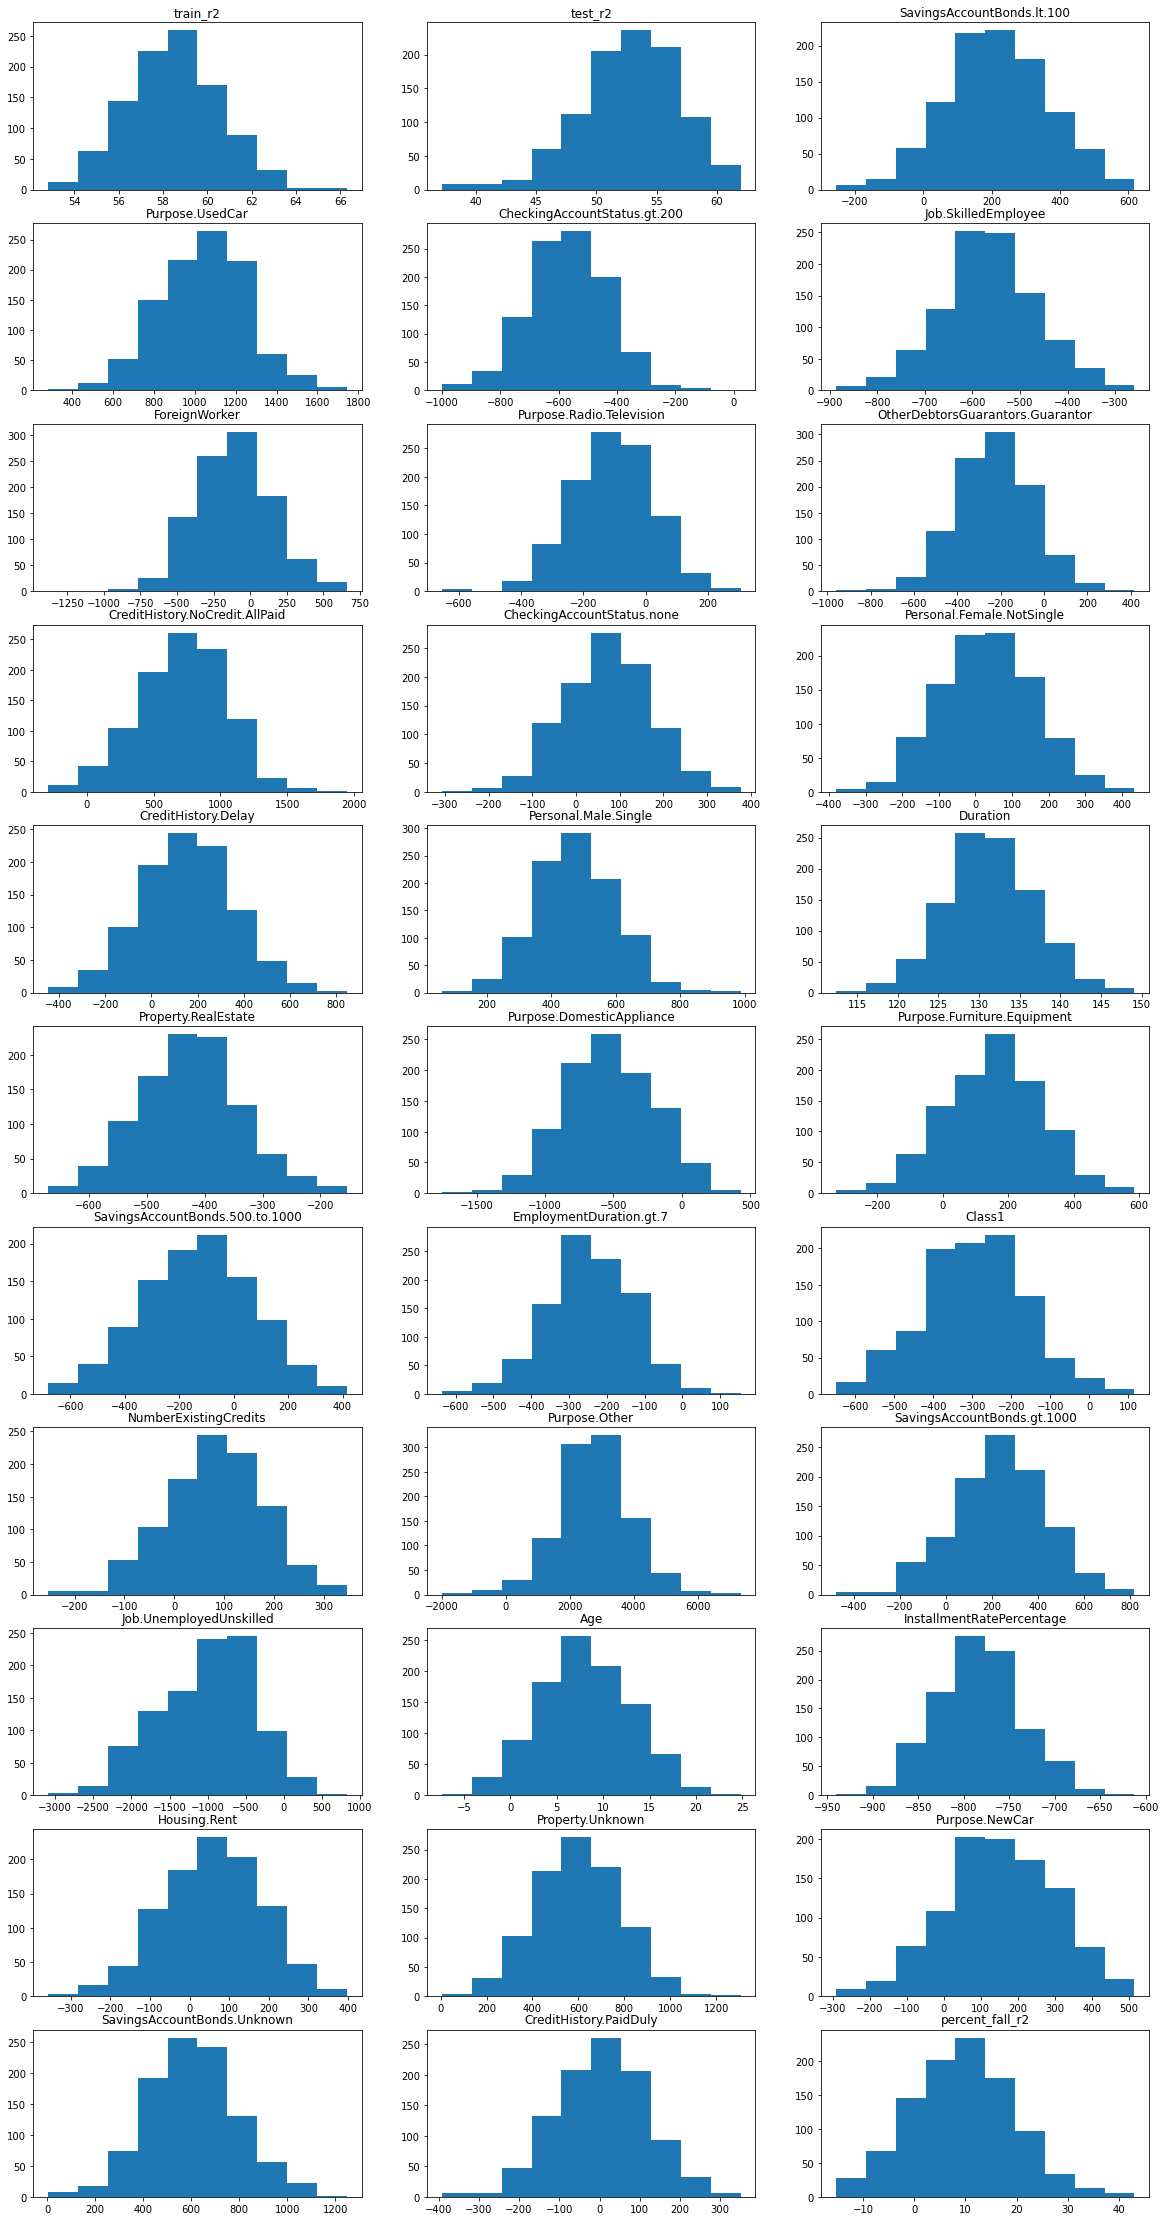

In [103]:
# Importing the required Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Creating Distribution Plots for all the Coefficients and the R-Squares
plt.figure(figsize=(20,40))
cols = model_sum.columns

for i in range(0, len(cols)):
    var = cols[i]
    plt.subplot(11,3,i+1)
    plt.hist(model_sum[var])
    plt.title(var)

##### Key Takeaways:

1. R-Square in the train data follows Normal Distribution
2. R- Square in the test data though follows a Normal Distribution but it is slightly left Skewed.
3. Almost all the Coefficients used in the model follows a Normal Dsitribution.
4. The last Graph shows the Percent Fall in R-Square from Train to Test. It can be seen that it also follows a Normal Dsitribution. 

### Compute the averages of all 1000 coefficients.

In [104]:
model_coef = model_sum.drop(columns = ['train_r2','test_r2','percent_fall_r2'])

In [105]:
model_describe = model_coef.describe()
model_describe

,SavingsAccountBonds.lt.100,Purpose.UsedCar,CheckingAccountStatus.gt.200,Job.SkilledEmployee,ForeignWorker,Purpose.Radio.Television,OtherDebtorsGuarantors.Guarantor,CreditHistory.NoCredit.AllPaid,CheckingAccountStatus.none,Personal.Female.NotSingle,...,Purpose.Other,SavingsAccountBonds.gt.1000,Job.UnemployedUnskilled,Age,InstallmentRatePercentage,Housing.Rent,Property.Unknown,Purpose.NewCar,SavingsAccountBonds.Unknown,CreditHistory.PaidDuly
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,216.452020,1044.320420,-568.500960,-564.617930,-112.585930,-107.13527,-228.502770,716.117040,73.198020,31.525170,...,2758.287310,235.263470,-1006.856870,8.075880,-782.816390,59.722840,596.608810,150.809520,608.431730,5.139410
std,149.224179,212.882751,135.285004,101.491041,260.313045,128.19216,176.131883,333.192394,99.501006,127.929811,...,1143.608753,198.579582,621.638684,4.928417,47.248071,123.661445,182.594861,147.560025,188.945645,112.512277
min,-255.820000,281.380000,-999.670000,-886.980000,-1380.750000,-654.15000,-960.560000,-287.190000,-306.370000,-380.860000,...,-1982.590000,-476.910000,-3091.380000,-7.360000,-940.310000,-356.790000,6.720000,-291.170000,4.520000,-391.250000
25%,116.717500,895.715000,-662.842500,-627.562500,-290.922500,-192.81000,-335.152500,500.230000,4.957500,-56.642500,...,2083.687500,106.320000,-1466.972500,4.485000,-813.827500,-23.617500,475.372500,55.435000,483.507500,-70.935000
50%,215.700000,1054.190000,-567.295000,-564.370000,-115.605000,-103.46000,-228.990000,723.570000,74.025000,32.395000,...,2769.800000,243.140000,-911.655000,7.910000,-783.350000,62.230000,596.055000,151.325000,603.820000,10.185000
75%,319.397500,1185.390000,-477.710000,-499.092500,57.792500,-21.64250,-109.040000,941.230000,136.832500,117.585000,...,3456.395000,374.227500,-554.890000,11.600000,-754.042500,147.980000,716.807500,257.787500,731.440000,82.515000
max,617.600000,1743.520000,23.430000,-259.300000,659.460000,304.82000,417.120000,1942.720000,376.480000,434.630000,...,7332.860000,819.220000,823.940000,24.790000,-612.270000,396.560000,1305.510000,514.880000,1247.660000,350.530000


In [106]:
# Extracting the Mean of all the Coefficients
coeff_mean = model_describe.iloc[1,]
coeff_mean

SavingsAccountBonds.lt.100           216.45202
Purpose.UsedCar                     1044.32042
CheckingAccountStatus.gt.200        -568.50096
Job.SkilledEmployee                 -564.61793
ForeignWorker                       -112.58593
Purpose.Radio.Television            -107.13527
OtherDebtorsGuarantors.Guarantor    -228.50277
CreditHistory.NoCredit.AllPaid       716.11704
CheckingAccountStatus.none            73.19802
Personal.Female.NotSingle             31.52517
CreditHistory.Delay                  154.21021
Personal.Male.Single                 474.18436
Duration                             131.25860
Property.RealEstate                 -424.27195
Purpose.DomesticAppliance           -528.49482
Purpose.Furniture.Equipment          153.67199
SavingsAccountBonds.500.to.1000     -132.60384
EmploymentDuration.gt.7             -245.33745
Class1                              -294.24275
NumberExistingCredits                 82.38190
Purpose.Other                       2758.28731
SavingsAccoun

### Compute the standard deviation of all 1000 coefficients (for each beta)

In [107]:
coeff_sd = model_describe.iloc[2,]
coeff_sd

SavingsAccountBonds.lt.100           149.224179
Purpose.UsedCar                      212.882751
CheckingAccountStatus.gt.200         135.285004
Job.SkilledEmployee                  101.491041
ForeignWorker                        260.313045
Purpose.Radio.Television             128.192160
OtherDebtorsGuarantors.Guarantor     176.131883
CreditHistory.NoCredit.AllPaid       333.192394
CheckingAccountStatus.none            99.501006
Personal.Female.NotSingle            127.929811
CreditHistory.Delay                  199.978909
Personal.Male.Single                 124.235089
Duration                               5.598732
Property.RealEstate                   87.888309
Purpose.DomesticAppliance            322.641932
Purpose.Furniture.Equipment          147.929501
SavingsAccountBonds.500.to.1000      200.390061
EmploymentDuration.gt.7              113.199297
Class1                               131.250114
NumberExistingCredits                 95.691213
Purpose.Other                       1143

### Compare average across 1000 to single model built using entire sample.


#### Building a Model with complete Dataset

In [108]:
# Create an object of the LinearRegression Model
model = LinearRegression()

# fit the model with the training data
model.fit(X, Y)

# Extracting the Coefficients of the model
coef = model.coef_.round(2)

In [109]:
# Comparing the Coefficients from the Whole Model with the Coefficients we got from the Iterated Model
coeff_compare = pd.DataFrame()
coeff_compare['Iterated_Coef'] = coeff_mean.round(2)
coeff_compare['Whole_Coef'] = coef.round(2)
coeff_compare['coeff_percent_diff'] = (((coeff_compare['Whole_Coef'] - coeff_compare['Iterated_Coef'])/coeff_compare['Iterated_Coef'])*100).round(2)

coeff_compare

,Iterated_Coef,Whole_Coef,coeff_percent_diff
SavingsAccountBonds.lt.100,216.45,220.41,1.83
Purpose.UsedCar,1044.32,1043.21,-0.11
CheckingAccountStatus.gt.200,-568.50,-569.78,0.23
Job.SkilledEmployee,-564.62,-567.90,0.58
ForeignWorker,-112.59,-118.10,4.89
Purpose.Radio.Television,-107.14,-107.81,0.63
OtherDebtorsGuarantors.Guarantor,-228.50,-247.78,8.44
CreditHistory.NoCredit.AllPaid,716.12,734.40,2.55
CheckingAccountStatus.none,73.20,73.09,-0.15
Personal.Female.NotSingle,31.53,25.46,-19.25


##### Key Takeaways:
1. Coefficients of most of the variables is not that much different in the two models
2. Coeffcients of variables like ForeignWorker, CreditHistory.PaidDuly have huge variation between the two models

### Comparing Confidence Intervals

In [110]:
# Confidence Interval for the Whole Model
import numpy as np, statsmodels.api as sm

mod = sm.OLS(Y, X)
res = mod.fit()
whole_data_ci = (res.conf_int(0.05)).round(2)   # 95% confidence interval
whole_data_ci.columns = ['FullModel_LowerBound', 'FullModel_UpperBound']
whole_data_ci['FullModel_Width'] = whole_data_ci['FullModel_UpperBound'] - whole_data_ci['FullModel_LowerBound']

whole_data_ci

,FullModel_LowerBound,FullModel_UpperBound,FullModel_Width
SavingsAccountBonds.lt.100,83.74,855.86,772.12
Purpose.UsedCar,734.40,1675.91,941.51
CheckingAccountStatus.gt.200,-1001.69,3.31,1005.00
Job.SkilledEmployee,-731.82,-225.13,506.69
ForeignWorker,93.48,1194.65,1101.17
Purpose.Radio.Television,-323.60,407.48,731.08
OtherDebtorsGuarantors.Guarantor,-756.67,347.85,1104.52
CreditHistory.NoCredit.AllPaid,311.07,1582.09,1271.02
CheckingAccountStatus.none,-185.02,360.96,545.98
Personal.Female.NotSingle,-175.39,572.84,748.23


In [119]:
# Getting Confidence interval for the Iterated model Coefficients
from math import sqrt

coeff_ci = pd.DataFrame()
coeff_ci['coeff_mean'] = coeff_mean.round(2)
coeff_ci['coeff_sd'] = coeff_sd.round(2)

# Finding the Confidence Interval
#coeff_ci['RepModel_LowerBound'] = (coeff_ci['coeff_mean'] - (1.96*(coeff_ci['coeff_sd']/(sqrt(632))))).round(2)
#coeff_ci['RepModel_UpperBound'] = (coeff_ci['coeff_mean'] + (1.96*(coeff_ci['coeff_sd']/(sqrt(632))))).round(2)

# Finding the Confidence Interval. The SD is already corrected for the Sample size N-1.
coeff_ci['RepModel_LowerBound'] = (coeff_ci['coeff_mean'] - (1.96*(coeff_ci['coeff_sd']))).round(2)
coeff_ci['RepModel_UpperBound'] = (coeff_ci['coeff_mean'] + (1.96*(coeff_ci['coeff_sd']))).round(2)

# Finding the Width of Confidence Interval
coeff_ci['RepModel_ScaledWidth'] = ((coeff_ci['RepModel_UpperBound'] - coeff_ci['RepModel_LowerBound'])*sqrt(.632)).round(2)

coeff_ci.head()

,coeff_mean,coeff_sd,RepModel_LowerBound,RepModel_UpperBound,RepModel_ScaledWidth
SavingsAccountBonds.lt.100,216.45,149.22,-76.02,508.92,465.02
Purpose.UsedCar,1044.32,212.88,627.08,1461.56,663.40
CheckingAccountStatus.gt.200,-568.50,135.29,-833.67,-303.33,421.61
Job.SkilledEmployee,-564.62,101.49,-763.54,-365.70,316.28
ForeignWorker,-112.59,260.31,-622.80,397.62,811.22


In [120]:
# Combining the Confidence INtervals from the Full Model and the Iterated Model
merged_ci = pd.concat([whole_data_ci,coeff_ci], axis = 1)
merged_ci = merged_ci [['FullModel_LowerBound', 'FullModel_UpperBound','RepModel_LowerBound', 'RepModel_UpperBound','FullModel_Width','RepModel_ScaledWidth']]
merged_ci

,FullModel_LowerBound,FullModel_UpperBound,RepModel_LowerBound,RepModel_UpperBound,FullModel_Width,RepModel_ScaledWidth
SavingsAccountBonds.lt.100,83.74,855.86,-76.02,508.92,772.12,465.02
Purpose.UsedCar,734.40,1675.91,627.08,1461.56,941.51,663.40
CheckingAccountStatus.gt.200,-1001.69,3.31,-833.67,-303.33,1005.00,421.61
Job.SkilledEmployee,-731.82,-225.13,-763.54,-365.70,506.69,316.28
ForeignWorker,93.48,1194.65,-622.80,397.62,1101.17,811.22
Purpose.Radio.Television,-323.60,407.48,-358.39,144.11,731.08,399.48
OtherDebtorsGuarantors.Guarantor,-756.67,347.85,-573.71,116.71,1104.52,548.87
CreditHistory.NoCredit.AllPaid,311.07,1582.09,63.07,1369.17,1271.02,1038.33
CheckingAccountStatus.none,-185.02,360.96,-121.82,268.22,545.98,310.08
Personal.Female.NotSingle,-175.39,572.84,-219.21,282.27,748.23,398.67


 Confidence intervals around coefficients of the iterated model are more tighter in comparison to the whole model.

## Summary Results

A. Distributions:

    1. R-Square in the train data follows Normal Distribution
    2. R- Square in the test data though follows a Normal Distribution but it is slightly left Skewed.
    3. Almost all the Coefficients used in the model follows a Normal Dsitribution.
    4. The last Graph shows the Percent Fall in R-Square from Train to Test. It can be seen that it also follows a Normal Dsitribution. 
    
B. Difference in the Coefficients between Full and Iterated/Repeated Model:

    1. Coefficients of most of the variables is not that much different in the two models
    2. Coeffcients of variables like ForeignWorker, CreditHistory.PaidDuly have huge variation between the two models

C. Width of Confidence Intervals between the Full and Iterated/Repeated Model

1. Confidence intervals around coefficients of the iterated model are more tighter in comparison to the whole model.
